In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
#Reading the CSV file containing our information
df = pd.read_csv("video_games_sales.csv", index_col= "rank")
df.describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [265]:
#Now we know that the year column is the only one with nulls, we should check if they are a significant amount of sales
dfna = df.loc[(df["year"].isnull())]
print(str(round(dfna["global_sales"].sum()*100/df["global_sales"].sum(),2)) + "%")

1.12%


In [266]:
#Looks like they are not a significant amount for our analysis, we proceed to clean our dataframe
df.dropna(inplace=True)

In [267]:
#Our analysis through time will be easier if we use the gaming consoles generations, this will 
#make it easier for us to detect purchase behaviour according to time specific tendencies
def generationing(row):
    if row["year"] >= 1980 and row["year"] < 1983:
        return "Second"
    elif row["year"] >= 1983 and row["year"] < 1988:
        return "Third"
    elif row["year"] >= 1988 and row["year"] < 1993:
        return "Fourth"
    elif row["year"] >= 1993 and row["year"] < 1999:
        return "Fifth"
    elif row["year"] >= 1999 and row["year"] < 2005:
        return "Sixth"
    elif row["year"] >= 2005 and row["year"] < 2012:
        return "Seventh"
    else:
        return "Eighth"

df["Generation"] = df.apply(lambda row: generationing(row), axis=1)

df

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,Generation
rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Seventh
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Third
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Seventh
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Seventh
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Fifth
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Sixth
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Sixth
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Seventh


Text(0, 0.5, 'Count')

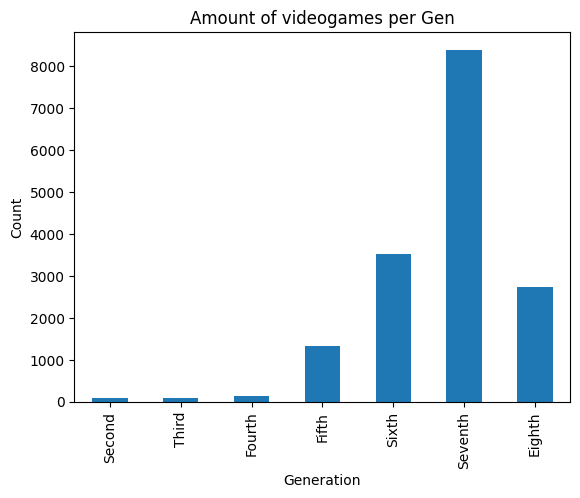

In [268]:
#Now to get the amount of released games in each generation, we group by generation and plot the count
category_count = df.groupby("Generation").size().reset_index(name='video game count').set_index("Generation")

#It wouldn't make much sense to plot the generations in alphabetical order so we order it correctly
generation_order = ["Second", "Third", "Fourth", "Fifth", "Sixth", "Seventh", "Eighth"]

#We use loc to rearrange the information in the dataset
ax = category_count.loc[generation_order].plot(kind= "bar", legend=None, title="Amount of videogames per Gen")

#And we use set_xticklabels to be sure the infomation plotted matches the information in the axis labels
ax.set_xticklabels(generation_order)
ax.set_ylabel("Count")

----
We can see that our analysis will be highly influenced by the concentration of game releases in the last 3 generations, which are the ones we are interested in as we don't plan to remaster an old game but to release a new one. Therefore we will discard generations from second to fifth (1980-1999.)


In [269]:
df = df[df["Generation"].str.contains("Second|Third|Fourth|Fifth") == False]

df_regions = df.copy(deep=True)
df_regions

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,Generation
rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Seventh
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Seventh
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Seventh
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Seventh
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Seventh
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Sixth
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Sixth
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Seventh


In [270]:
#As well, the first part of our analysis concerns the global sales of the videogames, we don't need the regional sales columns
df.drop(["na_sales", "eu_sales", "jp_sales", "other_sales", "year"], axis=1, inplace=True)

C:\Users\ja09a\AppData\Local\Temp\ipykernel_19552\2458645553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["na_sales", "eu_sales", "jp_sales", "other_sales", "year"], axis=1, inplace=True)


#### Our videogames experience has focused mainly in Action with an average global_sales of 27M USD, so we wanna see how the publishers with similar trajectories in this genre have done with other genres excluding platform genre which is outside of our interest area.

<Axes: title={'center': 'Average Sales per Genre 6th to 8th Gen'}, xlabel='Genre', ylabel='Global Sales (Million USD)'>

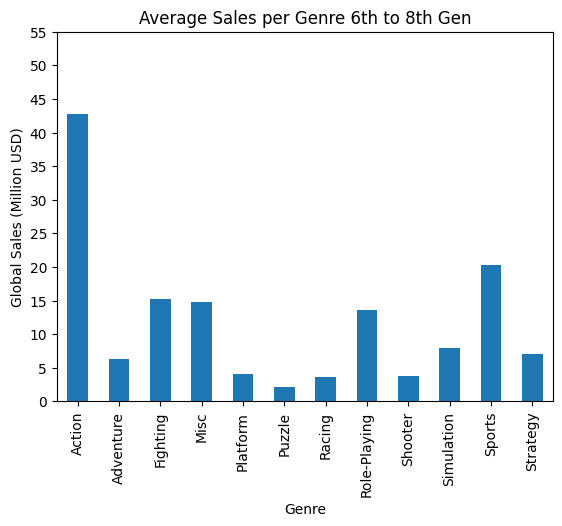

In [271]:
table = pd.pivot_table(df, index = "publisher", values = "global_sales", columns="genre", aggfunc=np.sum)

#Now we get the restraints given for the analysis according with our experience and external factors to take into account
aimed_sales = table[(table["Action"]> 27) & (table["Action"]< 60)  & (table["Platform"]< 60)]

#We get the mean sales for each genre
mean_aimed_sales = aimed_sales.T.mean(axis=1)
mean_aimed_sales.plot(kind= "bar", yticks=range(0,60, 5), ylabel="Global Sales (Million USD)", xlabel="Genre", 
                      title="Average Sales per Genre 6th to 8th Gen")

Working with the hypothesis that our success in expanding the genres our games offer will be average, we can see that companies that have **the same sales in Action** have had different behavior depending the genres they adventure into.  We can see that it's recommendable to venture into:

* Fighting
* Misc (Probably more than one genre in one game)
* Role-Playing
* Sports

The ambiguity from Misc comes from the fact that our data doesn't come from an inside or a very well documented source.


In [272]:
#We get a list of the indexes of the data that has use to us
publisher_series = pd.Series(aimed_sales.index)
publisher_series.index
important_genres = ["Fighting", "Misc", "Role-Playing", "Sports"]
genre_series = pd.Series(important_genres)

#We want the dataframes with that data alone
df_similar_companies = df[df["publisher"].isin(publisher_series)]
df_similar_companies = df_similar_companies[df_similar_companies["genre"].isin(genre_series)]

df_regions = df_regions[df_regions["publisher"].isin(publisher_series)]
df_regions = df_regions[df_regions["genre"].isin(genre_series)]

C:\Users\ja09a\AppData\Local\Temp\ipykernel_19552\2991075867.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totals = grouped_aimed.sum()


[Text(0, 0, 'Sixth'), Text(1, 0, 'Seventh'), Text(2, 0, 'Eighth')]

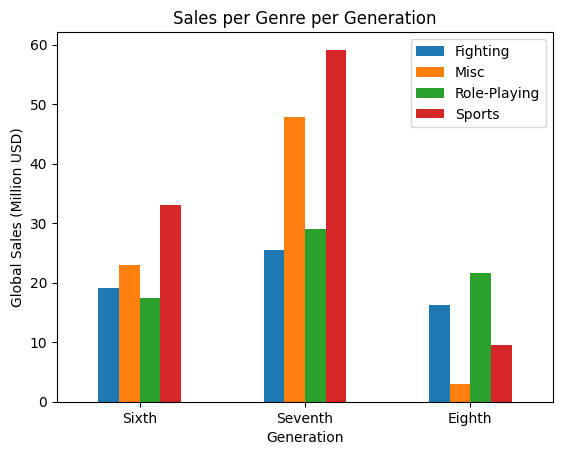

In [273]:
#Now we need to create the plot to visualize how genres have behaved during different generations
#Creating values and categories to plot on
grouped_aimed = df_similar_companies.groupby(["Generation", "genre"])
totals = grouped_aimed.sum()

#Setting the legend labels and the gen order to be plotted
ax2_legendlabels = ["Fighting", "Misc", "Role-Playing", "Sports"]
gen_order = ["Sixth", "Seventh", "Eighth"]

#Plotting and making it understandable
ax2 = totals.unstack().loc[gen_order].plot(kind="bar", stacked = False, ylabel="Global Sales (Million USD)", xlabel="Generation", 
                      title="Sales per Genre per Generation")
ax2.legend(ax2_legendlabels, loc="upper right")
xticklabels = ax2.get_xticklabels()
ax2.set_xticklabels(xticklabels, rotation=0)



C:\Users\ja09a\AppData\Local\Temp\ipykernel_19552\3053083034.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totals = grouped_aimed.sum()


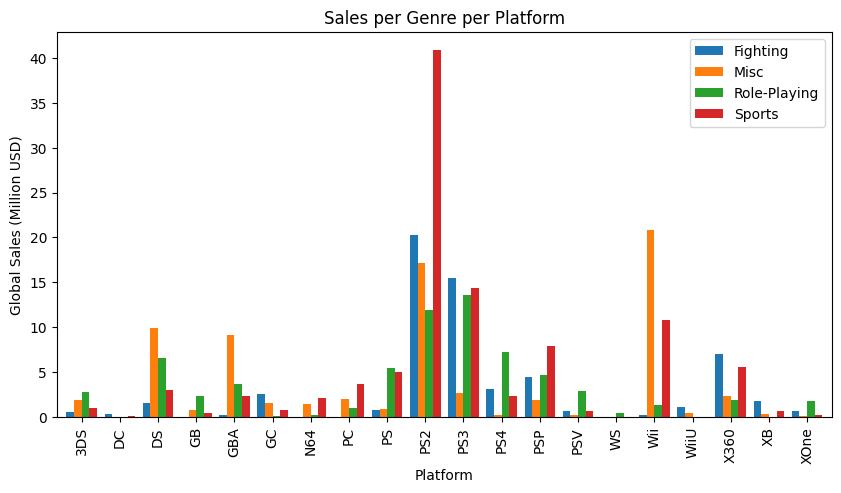

In [274]:
#Now we need to create the plot to visualize how genres have behaved in different platforms
#Creating values and categories to plot on
grouped_aimed = df_similar_companies.groupby(["platform", "genre"])
totals = grouped_aimed.sum()

#Setting the legend labels and the gen order to be plotted
ax3_legendlabels = ["Fighting", "Misc", "Role-Playing", "Sports"]
gen_order = ["Sixth", "Seventh", "Eighth"]

#Plotting and making it understandable
fig, ax3 = plt.subplots(figsize=(10,5))
ax2 = totals.unstack().plot(kind="bar", stacked = False, ylabel="Global Sales (Million USD)", xlabel="Platform", 
                      title="Sales per Genre per Platform", width = 0.8, ax=ax3)
ax3.legend(ax3_legendlabels, loc="upper right")
xticklabels = ax3.get_xticklabels()

#### We can see that as well as per generation, in each one of the most selling platforms sports and fighting tend to on top. With exception of the Wii console, which shows big Misc sales. This is the case for that console and the oldest mobile consoles like Nintendo DS and GameBoy Advance (third and fifth one in the chart), all of them being from Nintendo.

C:\Users\ja09a\AppData\Local\Temp\ipykernel_19552\2053569605.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totals = grouped_aimed.sum()


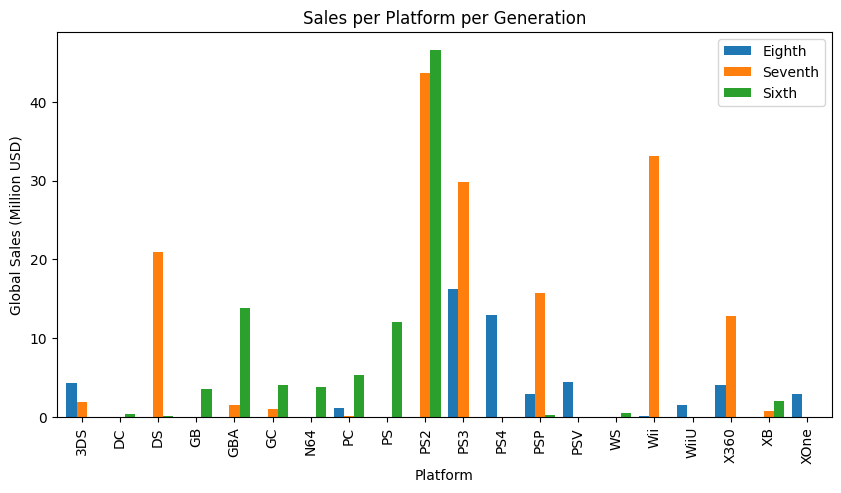

In [275]:
#Now we need to create the plot to visualize how platforms have behaved during different generations
#Creating values and categories to plot on
grouped_aimed = df_similar_companies.groupby(["platform", "Generation"])
totals = grouped_aimed.sum()

#Setting the legend labels and the gen order to be plotted
ax4_legendlabels = ["Eighth", "Seventh", "Sixth"]

#Plotting and making it understandable
fig, ax4 = plt.subplots(figsize=(10,5))
ax4 = totals.unstack().plot(kind="bar", stacked = False, ylabel="Global Sales (Million USD)", xlabel="Platform", 
                      title="Sales per Platform per Generation", width = 0.8, ax = ax4)
ax4.legend(ax4_legendlabels, loc="upper right")
xticklabels = ax4.get_xticklabels()


#### Finally, we want to be able to prioritize our marketing budget accordingly to the needs of every area and the sales potential they have shown historically.

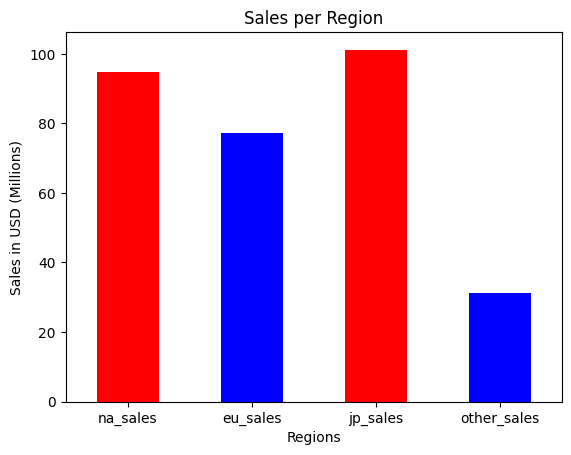

In [277]:
#First we get the sums we're interested in
df_sum_regions = df_regions[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=0)

#Now we create the chart, we can see in the new df_sum_regions that the 2 highest regions are NA and JP
axx = df_sum_regions.plot(kind="bar", title = "Sales per Region", xlabel= "Regions",
                     ylabel="Sales in USD (Millions)", color=["red", "blue", "red", "blue"])
#So we make them stand out to make our point, to prioritize these areas in marketing


xticklabels = axx.get_xticklabels()
axx.set_xticklabels(xticklabels, rotation=0)

plt.show()

## What can we conclude from the information described?

First let's remember that we're discussing the sales behavior of companies filtered down to be similar to us, not the overall market.

* The **Sales per Genre per Generation** chart tells us that, the trend in which Sports and and Misc games we're the best selling genres during the Sixth and Seventh gens, was totally interrupted in the Eighth generation (2013-2020). After this generation the pandemic happened and we have no data regarding the market in that time which is very important now as the trends have changed.

*Recommendation: To choose which project we should prioritize and how to work on it based on the genre, we can be sure Role-Playing and Sports are a safer bet than Misc and Fighting. The trends these genres show are growing over time with Sports having a bit of a harder time in the Eigth gen.*

* The **Sales per Genre per Platform** chart shows that the best selling consoles for Sports and, Fighting and Misc are the Sony Series Play Station, even though we see a little change into Role-Play with the Play Station 4. 

*Recomendation: Given the behavior seen in the past chart, we can foresee that the best platform in which to deploy our game would be Sony's Play Station.*

* The **Sales per Platform per Generation** chart tells the story of how console series have evolved through time. 

*Recommendation: We can see that the 8th gen (blue) is growing with time while new consoles are launched into the market. Play Station has had a better sales performance than Microsoft's Xbox line or any of Nintendo's. Thus backing up the third recommendation.*

* The **Sales per Region** chart directly tells us that Japan and North America are the best selling regions in our study, therefore deserving priority when marketing the new Role-Play or Sports videogame.